

# Keras Classification Project 

___

**This project is part of the <a href='https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/#instructor-1'>Python for Data Science and Machine Learning Bootcamp </a> imparted by instructor Jose Portilla.**
___

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.



In [8]:
#Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Get the data
df = pd.read_csv('cancer_classification.csv')

In [10]:
#Looking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
#Describe() method
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
#Exploring how the data looks
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# EDA

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

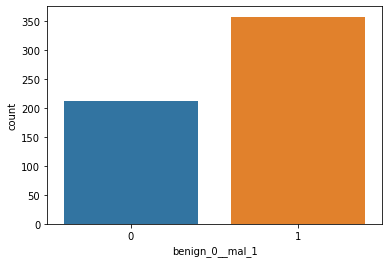

In [14]:
#Create a visualization with the distribution of benign and malicious category where 0 is benign and 1 malicious
sns.countplot(x="benign_0__mal_1", data=df)

<AxesSubplot:>

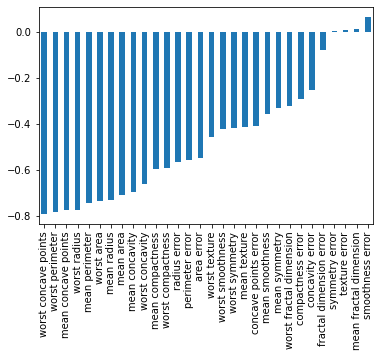

In [17]:
#Correlection with benign_0__mal_1
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

The plot shows very correlated values but with the majority of values demonstrating a negative correlation.

<AxesSubplot:>

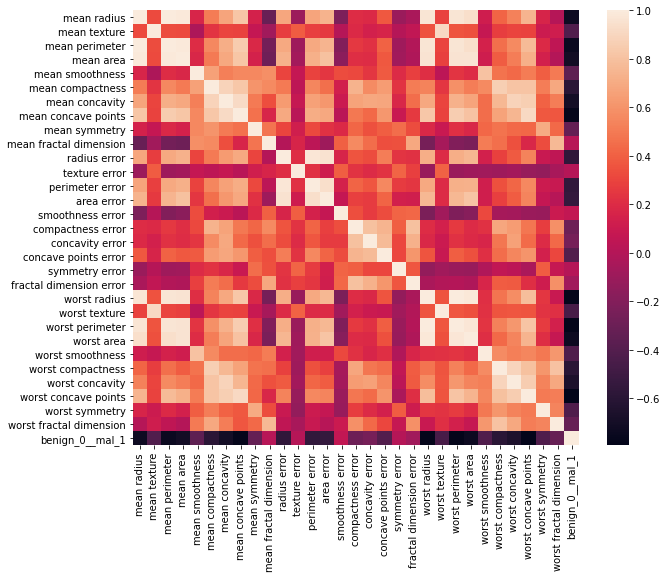

In [20]:
#Correlation of all features compared to every other feature
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

## Train Test Split

In [22]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scaling Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

## Creating the model

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense

In [31]:
X_train.shape

(426, 30)

### This is an example of choosing too many epochs and overfitting

In [32]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7056 - val_loss: 0.6979
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6854 - val_loss: 0.6791
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6677 - val_loss: 0.6641
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6511 - val_loss: 0.6459
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6325 - val_loss: 0.6251
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6106 - val_loss: 0.5966
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5762 - val_loss: 0.5552
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5364 - val_loss: 0.5130
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4949 - val_loss: 0.4701
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4544 - val_loss: 0.4270
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.1059
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0535 - val_loss: 0.1129
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.1104
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0532 - val_loss: 0.1046
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0543 - val_loss: 0.1099
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0570 - val_loss: 0.1065
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.1070
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.1045
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.1090
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0501 - val_loss: 0.1116
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.1054
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0364 - val_loss: 0.1004
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.1068
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.1053
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0432 - val_loss: 0.1080
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.1058
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.1004
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.1050
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 0.1073
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.0970
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.0976
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0283 - val_loss: 0.0919
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0258 - val_loss: 0.1004
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.1057
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.0989
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.0943
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0316 - val_loss: 0.1041
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.0908
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0236 - val_loss: 0.1046
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0248 - val_loss: 0.0962
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss: 0.1060
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0166 - val_loss: 0.0943
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.0988
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.1020
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.1023
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0939
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0960
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0152 - val_loss: 0.1072
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.0921
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.1040
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0976
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0897
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0982
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.1009
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0966
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.1003
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0938
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0945
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.1025
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0890
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.1005
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0968
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0981
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0930
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.1103
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0923
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0971
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0912
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0989
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0921
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.1162
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.1193
Epoch 571/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 0.1087
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.1089
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.1067
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.1066
Epoch 575/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.1055
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.1050
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.1067
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.1026
Epoc

In [34]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

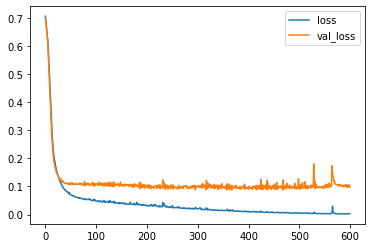

In [35]:
losses.plot()

The increase in the validation loss line indicates that the model is overfitting, meaning we are using to many epochs.

### This is an example of a model with an early stopping

In [46]:
#Using the same model
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [63]:
#EarlyStopping: Stop training when a monitored metric has stopped improving.

from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [65]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0781 - val_loss: 0.1062
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 0.1048
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 0.1028
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0849 - val_loss: 0.0976
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0800 - val_loss: 0.1097
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0793 - val_loss: 0.1006
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0721 - val_loss: 0.1004
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0986 - val_loss: 0.1019
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 0.1017
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0906 - val_loss: 0.1020
Epoch 11/

<AxesSubplot:>

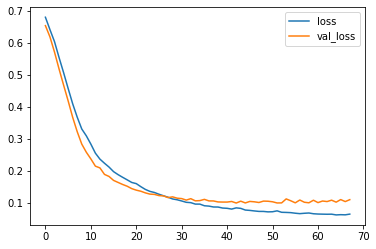

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In this case the result is better, since our model stopped when the traininf loss started to increase.

### Example with Dropout Layers

In [66]:
'''
Dropout layer randomly deactivates input units during training to reduce overfitting 
by breaking interdependencies among neurons.
'''
from tensorflow.keras.layers import Dropout

In [52]:
#Using same model
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) #adding Dropout

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5)) #adding Dropout

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7137 - val_loss: 0.6776
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6783 - val_loss: 0.6627
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6781 - val_loss: 0.6502
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6546 - val_loss: 0.6339
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6386 - val_loss: 0.6150
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6265 - val_loss: 0.5922
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6028 - val_loss: 0.5661
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5868 - val_loss: 0.5439
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5453 - val_loss: 0.5188
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5612 - val_loss: 0.4960
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1217 - val_loss: 0.1038
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0922 - val_loss: 0.0976
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1267 - val_loss: 0.1015
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1379 - val_loss: 0.1055
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1208 - val_loss: 0.1018
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1199 - val_loss: 0.0993
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1004 - val_loss: 0.1028
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1032 - val_loss: 0.1031
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1041 - val_loss: 0.1016
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1276 - val_loss: 0.1032
Epoch 93/600


In [54]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

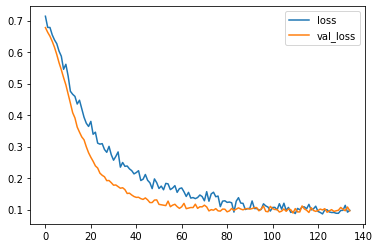

In [55]:
model_loss.plot()

The third result is even better, since both the training loss and the validation loss satarted going down and basically at the same rate.

# Model Evaluation

In [59]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [62]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]


Our model did a good job, the precision was of 0.99 and the recall was 0.98. 

The confusion matrix shows that the model only misclassified 3 point of the test set.